<a href="https://colab.research.google.com/github/Manjuphoenix/ML_team_buzz/blob/michelle/ProjectPDPModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Code for apple dataset



In [ ]:
#Drive + Unzipping the files into a new folder

from google.colab import drive
drive.mount('/content/gdrive')

import os
#new_folder_path = '/content/UnZipped'
#os.mkdir(new_folder_path)

!unzip gdrive/MyDrive/PlantDiseaseDataset/Apple.zip
#!kaggle datasets download -d manjuphoenix/appledataset

In [ ]:
import torch
import os
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch import utils
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from torch.utils.data import WeightedRandomSampler

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on", device)
torch.cuda.empty_cache()

Running on cuda


In [ ]:
#Update name of dataset
from collections import OrderedDict
from collections import Counter
path = '/content/Apple'
cls = os.listdir(path)
cls.sort()
class_map = OrderedDict()
class_count = []
for cl in cls:
  n = len(os.listdir(path + '/' + cl))
  class_map[cl] = n
  class_count.append(n)

print(class_map)
print(class_count)

class_sample_count = np.array(class_count)
weight = 1. / class_sample_count
weights = np.array(weight)
print(weights)

'''
class_sample_count = np.array(class_count)
weight = 1. / class_sample_count
print(weight)
weights = torch.from_numpy(weight)
'''

'''
#wj = n(count of imgs in total) / no.of.classes(k) * (count of images of this class j)
n = sum(class_map[k] for k in class_map)
k = len(class_map)
weights = []
for cls in class_map.keys():
  weights.append(n/((class_map[cls])*k))
print(n)
print(k)
print(class_map)
print(weights)
'''

'''
class_map_ratios = {k: class_map[k]/sum(class_map[k] for k in class_map) for k in class_map}
weights = []
for v in class_map_ratios.values():
  weights.append(1 - v)
print(weights)'''

OrderedDict([('Apple___Apple_scab', 2017), ('Apple___Black_rot', 1988), ('Apple___Cedar_apple_rust', 880), ('Apple___healthy', 5264)])
[2017, 1988, 880, 5264]
[0.00049579 0.00050302 0.00113636 0.00018997]


'\nclass_map_ratios = {k: class_map[k]/sum(class_map[k] for k in class_map) for k in class_map}\nweights = []\nfor v in class_map_ratios.values():\n  weights.append(1 - v)\nprint(weights)'

In [ ]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
import shutil

n = max(class_map.values())
cls = os.listdir(path)
cls.sort()

old_folder_path = "/content/Apple"
new_folder_path = '/content/AugmentedData'
os.mkdir(new_folder_path)

In [ ]:

print("The number is: ", n)
for cl in cls:
  x = len(os.listdir(old_folder_path + '/' + cl))
  if cl == 'Tomato___Early_blight':
    continue
  elif x < n:
    p = Augmentor.Pipeline(old_folder_path + '/' + cl)
    p.rotate(probability = 0.3, max_left_rotation=25, max_right_rotation=25)
    p.flip_random(0.3)
    p.sample(n)
    
    shutil.move(old_folder_path + '/' + cl + '/output', new_folder_path + '/' + cl)

  else:
    shutil.move(old_folder_path + '/' + cl, new_folder_path + '/' + cl) 


The number is:  5264
Initialised with 2016 image(s) found.
Output directory set to /content/Apple/Apple___Apple_scab/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FAE69D9BD10>: 100%|██████████| 5264/5264 [00:29<00:00, 180.11 Samples/s]


Initialised with 1988 image(s) found.
Output directory set to /content/Apple/Apple___Black_rot/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FAE6A93EED0>: 100%|██████████| 5264/5264 [00:28<00:00, 184.16 Samples/s]


Initialised with 880 image(s) found.
Output directory set to /content/Apple/Apple___Cedar_apple_rust/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FAE69EC1390>: 100%|██████████| 5264/5264 [00:27<00:00, 189.75 Samples/s]


In [ ]:
'''class ImbalancedDatasetSampler(torch.utils.data.sampler.Sampler):

    def __init__(self, dataset, indices=None, num_samples=None, callback_get_label=None):
                
        # if indices is not provided, 
        # all elements in the dataset will be considered
        self.indices = list(range(len(dataset))) \
            if indices is None else indices

        # define custom callback
        self.callback_get_label = callback_get_label

        # if num_samples is not provided, 
        # draw `len(indices)` samples in each iteration
        self.num_samples = len(self.indices) \
            if num_samples is None else num_samples
            
        # distribution of classes in the dataset 
        label_to_count = {}
        for idx in self.indices:
            label = self._get_label(dataset, idx)
            if label in label_to_count:
                label_to_count[label] += 1
            else:
                label_to_count[label] = 1
                
        # weight for each sample
        weights = [1.0 / label_to_count[self._get_label(dataset, idx)]
                   for idx in self.indices]
        self.weights = torch.DoubleTensor(weights)

    def _get_label(self, dataset, idx):
        return dataset.train_labels[idx].item()
                
    def __iter__(self):
        return (self.indices[i] for i in torch.multinomial(
            self.weights, self.num_samples, replacement=True))

    def __len__(self):
        return self.num_samples
'''

'class ImbalancedDatasetSampler(torch.utils.data.sampler.Sampler):\n\n    def __init__(self, dataset, indices=None, num_samples=None, callback_get_label=None):\n                \n        # if indices is not provided, \n        # all elements in the dataset will be considered\n        self.indices = list(range(len(dataset)))             if indices is None else indices\n\n        # define custom callback\n        self.callback_get_label = callback_get_label\n\n        # if num_samples is not provided, \n        # draw `len(indices)` samples in each iteration\n        self.num_samples = len(self.indices)             if num_samples is None else num_samples\n            \n        # distribution of classes in the dataset \n        label_to_count = {}\n        for idx in self.indices:\n            label = self._get_label(dataset, idx)\n            if label in label_to_count:\n                label_to_count[label] += 1\n            else:\n                label_to_count[label] = 1\n            

In [ ]:
#Transform to Tensor

transform_general = transforms.Compose(
    [transforms.Resize(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Doubt : Why Exactly do they usually resize the Input to 224x224?
#Note : Look up the concept of normalization again to fully understand why this is done
'''
transforms.RandomRotation(degrees = (0, 30)),
     transforms.RandomVerticalFlip([0.3]),
'''
pathnew = "/content/AugmentedData"
data_ = datasets.ImageFolder(pathnew, transform=transform_general)


'''
train_len = int(len(data_)*0.7)
train_set, test_set = random_split(data_, [train_len(data) - train_len])

classes_ = [train_set.dataset.targets[i] for i in train_set.indices]
class_count = Counter(classes_)
class_weights = torch.DoubleTensor([len(classes_)/c for c in pd.Series(class_count).sort_index().values])
weights = [class_weights[data_.dataset.targets[i]] for i in data_.indices]'''



#Split into 3 subsets -> 30 | 35 | 35
size1 = int(len(data_) * 0.3)
size2 = int((len(data_) - size1) / 2)
size3 = int(len(data_) - (size1 + size2))
data1, data2, data3 = utils.data.random_split(data_, [size1, size2, size3])

print(len(data_))

21056


In [ ]:
'''def balanced_weight_sampler(data):
    class_weights = []
    for root, subdir, files in os.walk(path):
      if len(files) > 0:
        class_weights.append(1/len(files))

    sample_weights = [0] * len(data)
    
    for idx, (data, label) in enumerate(data):
      class_weight = class_weights[label]
      sample_weights[idx] = class_weight
    
    #sampler = WeightedRandomSampler(weights, num_samples = len(weights), replacement = True)

    return sampler'''

'def balanced_weight_sampler(data):\n    class_weights = []\n    for root, subdir, files in os.walk(path):\n      if len(files) > 0:\n        class_weights.append(1/len(files))\n\n    sample_weights = [0] * len(data)\n    \n    for idx, (data, label) in enumerate(data):\n      class_weight = class_weights[label]\n      sample_weights[idx] = class_weight\n    \n    #sampler = WeightedRandomSampler(weights, num_samples = len(weights), replacement = True)\n\n    return sampler'

In [ ]:
def process_and_split__data(data):

  testSize = int(len(data) * 0.1)
  valSize = int((len(data) - testSize) * 0.2)
  trainSize = int((len(data) - (testSize + valSize)))

  print(trainSize, testSize, valSize)

  train_set, val_set, test_set = utils.data.random_split(data, [trainSize, valSize, testSize])
  
  '''
  y_train_indices = train_set.indices
  y_train = [data.targets[i] for i in y_train_indices]
  class_sample_count = np.array(
    [len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
  weight = 1. / class_sample_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
  '''


  '''
  y_train_indices = train_set.indices

  y_train = [data.targets[i] for i in y_train_indices]

  class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
  weight = 1. / class_sample_count
  samples_weight = np.array([weight[t] for t in y_train])
  samples_weight = torch.from_numpy(samples_weight)
  sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
  '''

  '''
  train_weights = balanced_weights(train_set.images, len(train_set.classes))
  test_weights = balanced_weights(train_set.images, len(train_set.classes))
  val_weights = balanced_weights(train_set.images, len(train_set.classes))

  sampler_train = WeightedRandomSampler(torch.DoubleTensor(train_weights), len(train_weights))
  sampler_test = WeightedRandomSampler(torch.DoubleTensor(train_weights), len(train_weights))
  sampler_val = WeightedRandomSampler(torch.DoubleTensor(train_weights), len(train_weights))
  '''
  
  #Use Dataloader to load the data into an itterable form (Set 1)
  train = utils.data.DataLoader(train_set, batch_size = 16)
  test = utils.data.DataLoader(test_set, batch_size = 16)
  val = utils.data.DataLoader(val_set, batch_size = 16)
  
  return train, test, val

In [ ]:
#Comparing DataDistribution between the two classes
def compareDataSegments(data1, data2, data3):
  data1loader = utils.data.DataLoader(data1, batch_size = 48, shuffle = True)
  data2loader = utils.data.DataLoader(data2,  batch_size = 48, shuffle = True)
  data3loader = utils.data.DataLoader(data2, batch_size = 48, shuffle = True)
  
  #Class Names of Numeric Labels
  classes = os.listdir(path)
  classes.sort()
  class_to_idx = {classes[i]: i for i in range(len(classes))}
  print(class_to_idx)

  class_count_data1 = DataCount(data1loader)
  class_count_data2 = DataCount(data2loader)
  class_count_data3 = DataCount(data3loader)

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_title('Data Distribution between segments of the Dataset', loc='left')

  # Set position of bar on X axis
  br1 = np.arange(len(class_count_data1))
  br2 = [x + 0.25 for x in br1]
  br3 = [x + 0.25 for x in br2]

  ax.bar(br1, class_count_data1, color = 'blue', width = 0.25, edgecolor ='black')
  ax.bar(br2, class_count_data2, color = 'grey', width = 0.25, edgecolor ='black')
  ax.bar(br3, class_count_data3, color = 'pink', width = 0.25, edgecolor ='black')


  plt.xlabel('Data Segments', fontweight='bold')
  plt.ylabel('Class Count', fontweight='bold')
  plt.xticks([r + 0.25 for r in range(len(class_count_data1))], [str(c) for c in range(len(class_count_data1))])
    
  plt.show()

In [ ]:
#Update class_count to the number of classes here

#calculating the class distribution over a dataset
def DataCount(dataloader):
  class_count = np.zeros((4,), dtype=int)
  for i, batch in enumerate(dataloader):
      image, classes = batch
      labels = np.array(classes)
      for label in labels:
        for i in range(len(classes)):
          if(label == i):
            class_count[i] = class_count[i] + 1
  print(class_count)
  return class_count

In [ ]:
#Plotting the claculated class distributions
def plot_class_distributions(class_count_train, class_count_test):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.set_title('Data Distribution', loc='left')

  # Set position of bar on X axis
  br1 = np.arange(len(class_count_train))
  br2 = [x + 0.25 for x in br1]
  br3 = [x + 0.25 for x in br2]

  ax.bar(br1, class_count_train, color = 'grey', width = 0.25, edgecolor ='black', label = 'Train')
  ax.bar(br2, class_count_test, color = 'pink', width = 0.25, edgecolor ='black', label = 'Test')

  plt.xlabel('DataSets', fontweight='bold')
  plt.ylabel('Class Count', fontweight='bold')
  plt.xticks([r + 0.25 for r in range(len(class_count_train))], [str(c) for c in range(len(class_count_train))])
   
  plt.show()

  #Class Names of Numeric Labels
  classNames = os.listdir(pathnew)
  classNames.sort()
  class_to_idx = {classNames[i]: i for i in range(len(classNames))}
  print(class_to_idx)

In [ ]:
#CURRENTLY NOT IN USE
#Class Ratios : Are they as even as expected?
def check_class_ratio(class_count_train, class_count_test, classes):
  class_ratios = np.zeros(())
  #Initialize an empty zeroes array for all 39 classes

  for i in range(len(classes)):
    aggregate = class_count_train[i] + class_count_test[i]
    #print(aggregate)
    class_ratios[i][0] = round((class_count_train[i] / aggregate) * 100, 2)
    class_ratios[i][1] = round((class_count_test[i] / aggregate) * 100, 2)

  print("Rough Percentage of Class Division amongst the three train and test sets")
  for i in range(len(classes)):
    print(class_ratios[i])
    print()

In [ ]:
#Creating a simple CNN architechture
class SimpleCustomCNN(nn.Module):
  def __init__(self):
    super(SimpleCustomCNN, self).__init__()

    #Defining a sequential model layers
    self.c1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size=1, padding=0, stride=1),
        nn.LeakyReLU(),
    )
    #self.bn2d = nn.BatchNorm2d(16)
    self.c2 = nn.Sequential(
        nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size=5, padding=0, stride=1),
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.c3 = nn.Sequential(
        nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=3, padding=0, stride=1),
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.drop = nn.Dropout()
    self.fc = nn.Linear(in_features = 54*54*32, out_features = 4)
    #26*26*16
  def forward(self, x):
    output = self.c1(x)
    output = self.c2(output)
    #output = self.drop(output)
    output = self.c3(output)
    output = output.reshape(output.size(0), -1)
    #or nn.Flatten()
    output = self.drop(output)
    output = self.fc(output)
    return output

In [ ]:
#Calling all the functions to visualize the Data
def datasets_visualization(train, test):

  dataiter = iter(train)
  images, classes = dataiter.next()

  print(type(images))
  print(images.shape)
  print(classes.shape)

  class_count_train = DataCount(train)
  class_count_test = DataCount(test)

  #Check if the Ratio of the Train:Val:Test has been maintained through the classes:
  #check_class_ratio(class_count_train, class_count_test, classes)

  #Plot to Visualize the way Data is Distributed between the sets
  plot_class_distributions(class_count_train, class_count_test)


In [ ]:
def train_validate_model(e, train, test, val, model, optimizer):

  train_losses = []
  train_accuracy_list = []

  test_losses = []
  test_accuracy_list = []

  val_losses = []
  val_accuracy_list = []

  # Initialize the prediction and label lists(tensors)
  predlist=torch.zeros(0,dtype=torch.long, device='cpu')
  lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

  predlist__ =torch.zeros(0,dtype=torch.long, device='cpu')
  lbllist__ =torch.zeros(0,dtype=torch.long, device='cpu')

  for epoch in range(e):

    run_loss = 0.0
    val_loss = 0.0
    t_loss = 0.0

    #TRAINING

    model.train()
    correct = 0
    total = 0

    for img, class_ in train:
      
          img, class_ = img.to(device), class_.to(device)

          optimizer.zero_grad()
          preds = model(img)

          loss = lossCriteria(preds, class_)

          loss.backward()
          optimizer.step()

          run_loss += loss.item()

          _, predicted = preds.max(1)
          total += class_.size(0)
          correct += predicted.eq(class_).sum().item()

    
    accuracy_train = correct * 100. / total
    train_accuracy_list.append(accuracy_train)


    train_loss = run_loss / len(train.sampler)
    train_losses.append(train_loss)

    #validate
    with torch.no_grad():
      model.eval()
      correct_ = 0
      total_ = 0
      
      for img, class_ in val:

          img, class_ = img.to(device), class_.to(device)

          preds_ = model(img)
          loss = lossCriteria(preds_, class_)
          val_loss += loss.item()
            
          _, predicted = preds_.max(1)
          total_ += class_.size(0)
          correct_ += predicted.eq(class_).sum().item()

          #Append batch prediction results
          predlist = torch.cat([predlist, predicted.view(-1).cpu()])
          lbllist = torch.cat([lbllist, class_.view(-1).cpu()])

    
    accuracy_val = correct_ * 100. / total_
    val_accuracy_list.append(accuracy_val)


    val_loss = val_loss / len(test.sampler)
    val_losses.append(val_loss)


    print('Epoch: {} \tTraining Loss: {:.4f} \tTraining Accuracy: {:.4f} \tValidation Loss: {:.4f} \tValidation Accuracy: {:.4f}'.format(epoch, train_loss, accuracy_train, val_loss, accuracy_val))

  #test
  with torch.no_grad():
    model.eval()
    correct_ = 0
    total_ = 0
      
    for img, class_ in test:

        img, class_ = img.to(device), class_.to(device)

        preds_ = model(img)
        loss = lossCriteria(preds_, class_)
        t_loss += loss.item()
            
        _, predicted = preds_.max(1)
        total_ += class_.size(0)
        correct_ += predicted.eq(class_).sum().item()
        
        #Append batch prediction results
        predlist__ = torch.cat([predlist__, predicted.view(-1).cpu()])
        lbllist__ = torch.cat([lbllist__, class_.view(-1).cpu()])

    accuracy_test = correct_ * 100. / total_
    test_accuracy_list.append(accuracy_test)


    t_loss = t_loss / len(test.sampler)
    test_losses.append(t_loss)
  
  #Confusion matrix
  conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
  print("The Val conf mat ", conf_mat)

  #Per-class accuracy
  class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
  print("Per class validation accuracy ", class_accuracy)

  #Confusion matrix
  conf_mat = confusion_matrix(lbllist.numpy(), predlist.numpy())
  print("The Test conf mat ", conf_mat)

  #Per-class accuracy
  class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
  print("Per class testing accuracy ", class_accuracy)

  #Using sns heatmap to represent
  '''
  nb_classes = 4
  confusion_matrix = np.zeros((nb_classes, nb_classes))
  with torch.no_grad():
      for i, (inputs, classes) in enumerate(test):
          inputs = inputs.to(device)
          classes = classes.to(device)
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          for t, p in zip(classes.view(-1), preds.view(-1)):
                  confusion_matrix[t.long(), p.long()] += 1

  plt.figure(figsize=(10, 8))

  class_names = list(os.listdir(path))
  df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
  heatmap = sn.heatmap(df_cm, annot=True, fmt="d")

  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  '''
 

  return train_losses, train_accuracy_list, test_losses, test_accuracy_list, val_losses, val_accuracy_list


In [ ]:
#Visulaize the Results
def plot_acc_curve(train_accuracy, validation_accuracy):

  plt.plot(train_accuracy, color='green')
  plt.plot(validation_accuracy, color='blue')
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.title('Training, Validation and Testing Accuracy')
 
  plt.show()

def plot_loss_curve(train_losses, validation_losses):
  plt.plot(train_losses, color='green')
  plt.plot(validation_losses, color='blue')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.title('Training, Validation and Testing Losses')
 
  plt.show()

In [ ]:
#Call the Train and Validate and Test Functions
def train_validate_models(model_, train, test, val, optimizer_):
  train_losses, train_accuracy, test_losses, test_accuracy, val_losses, val_accuracy = train_validate_model(20, train, test, val, model_, optimizer_)
  
  plot_loss_curve(train_losses, val_losses)
  plot_acc_curve(train_accuracy, val_accuracy)

  print('Testing loss', test_losses)
  print('Testing Accuracy', test_accuracy)

In [ ]:
#Splitting into training and testing datasets
train1, test1, val1 = process_and_split__data(data_)
train2, test2, val2 = process_and_split__data(data2)
train3, test3, val3 = process_and_split__data(data3)

15161 2105 3790
5307 737 1326
5307 737 1326


In [ ]:
'''
def visualizations():

  #Visualizing the Induvidual Datasets :
  print("Dataset Segment 1 : ")
  datasets_visualization(train1, test1)
  print("Dataset Segment 2 : ")
  datasets_visualization(train2, test2)
  print("Dataset Segment 3 : ")
  datasets_visualization(train3, test3)

  #Compare these Data Segemnts
  compareDataSegments(data1, data2, data3)

visualizations()
'''

'\ndef visualizations():\n\n  #Visualizing the Induvidual Datasets :\n  print("Dataset Segment 1 : ")\n  datasets_visualization(train1, test1)\n  print("Dataset Segment 2 : ")\n  datasets_visualization(train2, test2)\n  print("Dataset Segment 3 : ")\n  datasets_visualization(train3, test3)\n\n  #Compare these Data Segemnts\n  compareDataSegments(data1, data2, data3)\n\nvisualizations()\n'

SimpleCustomCNN(
  (c1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
  )
  (c2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (c3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=93312, out_features=4, bias=True)
)
Epoch: 0 	Training Loss: 0.0453 	Training Accuracy: 68.9994 	Validation Loss: 0.0597 	Validation Accuracy: 79.3931
Epoch: 1 	Training Loss: 0.0268 	Training Accuracy: 83.2135 	Validation Loss: 0.0406 	Validation Accuracy: 86.2797
Epoch: 2 	Training Loss: 0.0208 	Training Accuracy: 87.3755 	Validation Loss: 0.0333 	Validation Accuracy: 88.5752
E

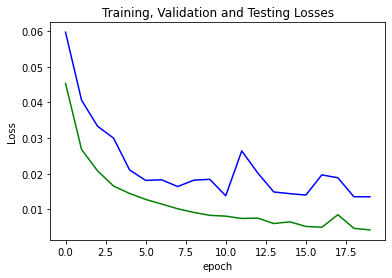

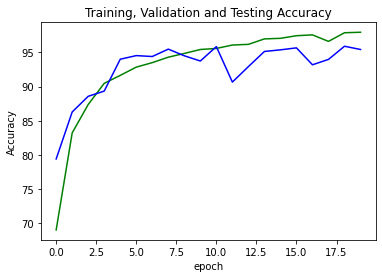

Testing loss [0.007528959382148437]
Testing Accuracy [96.00950118764845]


In [ ]:
#Cross Entropy Function
lossCriteria = nn.CrossEntropyLoss()
#weight = torch.tensor(loss_func_weights).to(device)

#Initialize model and optimizer 1
#Note : 0.01 is actually the default value of the weight decay
model1 = SimpleCustomCNN().to(device)
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.005, weight_decay = 0.01)
print(model1)
#Calling the training function for model 1
train_validate_models(model1, train1, test1, val1, optimizer1)


In [ ]:
'''#Initialize model and optimizer 2
model2 = SimpleCustomCNN().to(device)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.005, weight_decay = 0.01)
print(model2)
#Calling the training function for model 2
train_validate_models(model2, train2, test2, val2, optimizer2)'''


'#Initialize model and optimizer 2\nmodel2 = SimpleCustomCNN().to(device)\noptimizer2 = torch.optim.SGD(model2.parameters(), lr=0.005, weight_decay = 0.01)\nprint(model2)\n#Calling the training function for model 2\ntrain_validate_models(model2, train2, test2, val2, optimizer2)'

In [ ]:
'''#Initialize model and optimizer 3
model3 = SimpleCustomCNN().to(device)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.001, weight_decay = 0.01)
print(model3)
#Calling the training function for model 3
train_validate_models(model3, train3, test3, val3, optimizer3)'''

'#Initialize model and optimizer 3\nmodel3 = SimpleCustomCNN().to(device)\noptimizer3 = torch.optim.SGD(model3.parameters(), lr=0.001, weight_decay = 0.01)\nprint(model3)\n#Calling the training function for model 3\ntrain_validate_models(model3, train3, test3, val3, optimizer3)'

In [ ]:
'''
#Visualize through a confusion matrix

#Getting the list of prediction made by model
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

#Counting the total number of correct predictions made
def get_num_correct():

#Calling above two functions
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train1, batch_size=10000)
    train1_preds = get_all_preds(network, prediction_loader)
preds_correct = get_num_correct(train1_preds, train1.targets)

print('Total Correct:', preds_correct)
print('Accuracy:', preds_correct / len(train1))'''

"\n#Visualize through a confusion matrix\n\n#Getting the list of prediction made by model\ndef get_all_preds(model, loader):\n    all_preds = torch.tensor([])\n    for batch in loader:\n        images, labels = batch\n\n        preds = model(images)\n        all_preds = torch.cat(\n            (all_preds, preds)\n            ,dim=0\n        )\n    return all_preds\n\n#Counting the total number of correct predictions made\ndef get_num_correct():\n\n#Calling above two functions\nwith torch.no_grad():\n    prediction_loader = torch.utils.data.DataLoader(train1, batch_size=10000)\n    train1_preds = get_all_preds(network, prediction_loader)\npreds_correct = get_num_correct(train1_preds, train1.targets)\n\nprint('Total Correct:', preds_correct)\nprint('Accuracy:', preds_correct / len(train1))"

In [ ]:
path = '/content/AugmentedData'
cls = os.listdir(path)
cls.sort()
class_map = OrderedDict()
class_count = []
for cl in cls:
  n = len(os.listdir(path + '/' + cl))
  class_map[cl] = n
  class_count.append(n)

print(class_map)

OrderedDict([('Apple___Apple_scab', 5264), ('Apple___Black_rot', 5264), ('Apple___Cedar_apple_rust', 5264), ('Apple___healthy', 5264)])


In [ ]:
#saving model state:
torch.save(model1.state_dict(), '/content/gdrive/MyDrive/Model2_SGD_trial_1_fulldataset.pk1')
model_scripted = torch.jit.script(model1) # Export to TorchScript
model_scripted.save('torch_Script_of_model2_sgd_trial1.pt') # Save

In [ ]:
#Load Previously saved model
'''
modelOld =  SimpleCustomCNN().to(device)
modelOld.load_state_dict = torch.load('/content/gdrive/MyDrive/CustomCNN_93.4911_apple')
print(modelOld)
modelOld.to(device)
'''

"\nmodelOld =  SimpleCustomCNN().to(device)\nmodelOld.load_state_dict = torch.load('/content/gdrive/MyDrive/CustomCNN_93.4911_apple')\nprint(modelOld)\nmodelOld.to(device)\n"